### DATASET

In [27]:
import numpy as np
np.random.seed(42)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [29]:
dataset = load_breast_cancer()

print(f"ClassNames: {dataset.target_names}")
print(f"DESCR:\n{dataset.DESCR}")

ClassNames: ['malignant' 'benign']
DESCR:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 fea

In [30]:
x = dataset.data
y = dataset.target

print(f"x-shape: {x.shape}") # 569 Samples, 30 Features
print(f"y-shape: {y.shape}")

x-shape: (569, 30)
y-shape: (569,)


### PCA

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

$z = \frac{x - u}{s}$

Mittelwert wird abgezogen und dann durch die Standardabweichung

In [32]:
scaler = StandardScaler()
scaler.fit(x)

# StandardScaler.fit(x)
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
# print(f"x-mean:\n{x_mean}")
# print(f"x-std:\n{x_std}")

x_standardized = scaler.transform(x)
print(f"x_standardized:\n{x_standardized}")

# StandardScaler.transform(x)
x_ = print(f"x_:\n{(x - x_mean) / x_std}")

x_standardized:
[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
x_:
[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [36]:
# Auf wie viele Dimensionen den Datensatz runterbrechen
n_components = 2
pca = PCA(n_components=n_components, copy=True)
pca.fit(x_standardized)
x_pca = pca.transform(x_standardized)

In [37]:
print(f"Components:\n{pca.components_}") # (2,30) * (569, 30).T => (2,30) * (30, 569) => (2, 569)
print(f"Explained Variance:\n{pca.explained_variance_}")
print(f"Explained Variance Ratio:\n{pca.explained_variance_ratio_}")
print(f"Sum of Explained Variance Ratio:\n{sum(pca.explained_variance_ratio_)}")

Components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
Explained Variance:
[13.30499079  5.7013746 ]
Explained Variance Ratio:
[0.44272026 0.18971182]
Sum of Explained Variance Ratio:
0.6324320765155942


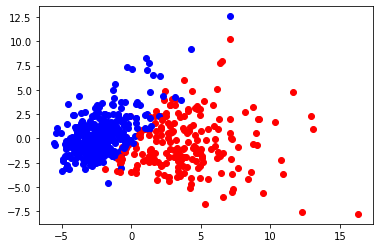

In [38]:
colors = ["red", "blue"]
for index, point in enumerate(x_pca):
    plt.scatter(point[0], point[1], color=colors[y[index]])
plt.show()